In [149]:
import numpy as np
import pandas as pd
import warnings
import talib as ta
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [150]:
data = pd.read_excel('sz50.xlsx', sheetname=None, index_col='datetime')

In [151]:
print(data.keys())

odict_keys(['600000.XSHG', '600016.XSHG', '600028.XSHG', '600029.XSHG', '600030.XSHG', '600036.XSHG', '600048.XSHG', '600050.XSHG', '600100.XSHG', '600104.XSHG', '600111.XSHG', '600340.XSHG', '600485.XSHG', '600518.XSHG', '600519.XSHG', '600547.XSHG', '600606.XSHG', '600837.XSHG', '600887.XSHG', '600919.XSHG', '600958.XSHG', '600999.XSHG', '601006.XSHG', '601088.XSHG', '601166.XSHG', '601169.XSHG', '601186.XSHG', '601198.XSHG', '601211.XSHG', '601229.XSHG', '601288.XSHG', '601318.XSHG', '601328.XSHG', '601336.XSHG', '601390.XSHG', '601398.XSHG', '601601.XSHG', '601628.XSHG', '601668.XSHG', '601688.XSHG', '601766.XSHG', '601788.XSHG', '601800.XSHG', '601818.XSHG', '601857.XSHG', '601881.XSHG', '601901.XSHG', '601985.XSHG', '601988.XSHG', '601989.XSHG'])


In [162]:
stock = pd.read_excel('sz50.xlsx',sheetname='600036.XSHG', index_col='datetime')#调取数据
#读取data里600036这只股票的dataframe
DF=pd.DataFrame(pd.read_excel('sz50.xlsx',sheetname='600036.XSHG', index_col='datetime'))

In [165]:
#向前填充缺失值
DF_na = DF.fillna(method='ffill')

In [166]:
#将其收盘价换成用Numpy的Array格式
ndarray = np.array(DF_na.close)

In [169]:
#用talib计算10日均线值，返回ndarray的最后五个值
print(ta.MA(ndarray,timeperiod=10)[-5:])

[ 108.35   108.741  109.176  110.102  111.666]


In [170]:
#将ndarray转化为series格式
s = pd.Series(ta.MA(ndarray,timeperiod=10))

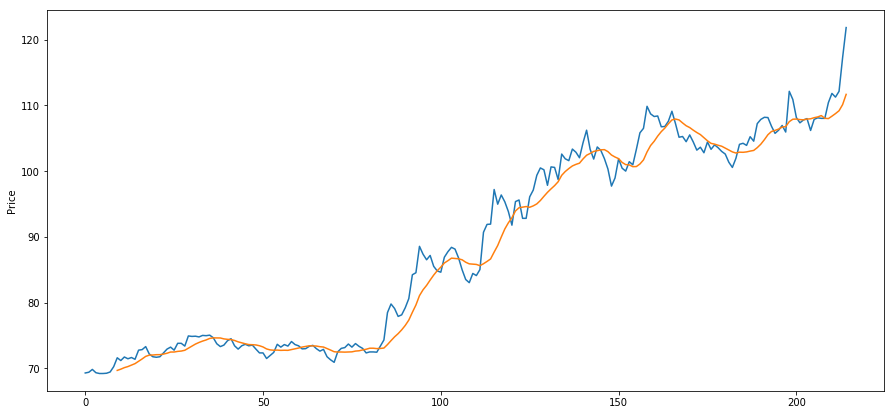

In [171]:
#将价格和MA值用Matplotlib展示出来
plt.figure(figsize=(15, 7))
plt.plot(ndarray)
plt.plot(s)
plt.ylabel('Price')
plt.show()

In [185]:
pd.read_excel('sz50.xlsx', sheetname=None, index_col='datetime')
for s in data.keys():
    s=pd.read_excel('sz50.xlsx', sheetname=s, index_col='datetime')


In [176]:
#读取panel数据：所有股票
stocks = pd.Panel({s: pd.read_excel('sz50.xlsx', sheetname=s, index_col='datetime') 
                   for s in data.keys()})
ROCR100 = pd.DataFrame({item: ta.ROCR100(value.values) for item, value in stocks.minor_xs('close').iteritems()}, 
             index = stocks.minor_xs('close').index)
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15, 7))
plt.hlines(100,ROCR100.index[0],ROCR100.index[-1] , linestyles='dashed', alpha=0.5)
plt.plot(ROCR100[:5])
plt.show()

Exception: inputs are all NaN